In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, KernelPCA
from sklearn.manifold import TSNE
from matplotlib import pyplot as plt
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

In [9]:
import warnings
warnings.filterwarnings("ignore")

In [18]:
heart_dataset = pd.read_csv("heart.csv")
heart_dataset.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [19]:
heart_dataset.shape

(918, 12)

In [20]:
heart_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [21]:
heart_dataset.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


<AxesSubplot:xlabel='Sex', ylabel='count'>

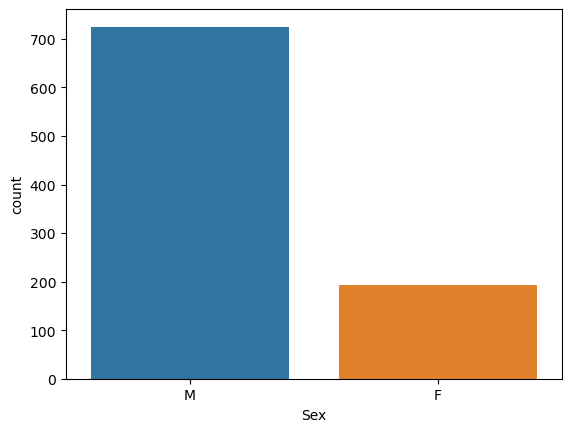

In [24]:
heart_dataset['Sex'].value_counts()
sns.countplot(data=heart_dataset, x='Sex')

<AxesSubplot:xlabel='ChestPainType', ylabel='count'>

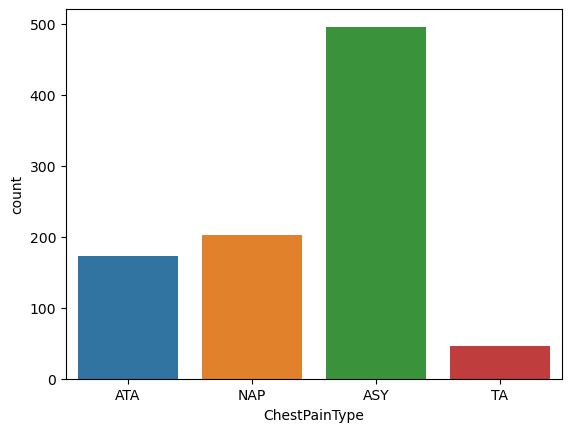

In [25]:
heart_dataset['ChestPainType'].value_counts()
sns.countplot(data=heart_dataset, x='ChestPainType')

In [58]:
heart_2 = heart_dataset.copy()

In [59]:
X = heart_2.drop(columns="HeartDisease" , axis=1)
Y = heart_2["HeartDisease"]

In [60]:
X["RestingECG"].value_counts()

Normal    552
LVH       188
ST        178
Name: RestingECG, dtype: int64

In [61]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
X['RestingECG'] = encoder.fit_transform(X['RestingECG'])

In [62]:
X.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,M,ATA,140,289,0,1,172,N,0.0,Up
1,49,F,NAP,160,180,0,1,156,N,1.0,Flat
2,37,M,ATA,130,283,0,2,98,N,0.0,Up
3,48,F,ASY,138,214,0,1,108,Y,1.5,Flat
4,54,M,NAP,150,195,0,1,122,N,0.0,Up


In [63]:
X["RestingECG"].value_counts()

1    552
0    188
2    178
Name: RestingECG, dtype: int64

In [68]:
heart_dataset = pd.read_csv("heart.csv")
encoder = LabelEncoder()
categorical_features = heart_dataset.columns.tolist()
for col in categorical_features:
    heart_dataset[col] = encoder.fit_transform(heart_dataset[col])
    
heart_dataset.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,12,1,1,41,147,0,1,98,0,10,2,0
1,21,0,2,55,40,0,1,82,0,20,1,1
2,9,1,1,31,141,0,2,25,0,10,2,0
3,20,0,0,39,72,0,1,34,1,25,1,1
4,26,1,2,49,53,0,1,48,0,10,2,0


In [69]:
X = heart_dataset.drop('HeartDisease', axis = 1)
y = heart_dataset['HeartDisease']

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [71]:
scaler=StandardScaler()
scaler.fit(X_train)

X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

In [74]:
pca = PCA(n_components=2, random_state=123)
pca.fit(X_train)
pca_result = pca.transform(X_train)
pca_result

array([[ 2.14544706,  2.53240195],
       [-2.58184568, -0.55449771],
       [-0.15879255,  1.28258854],
       ...,
       [ 1.41975237,  1.47830823],
       [ 1.54593766,  0.56210601],
       [ 0.3144652 , -1.11935982]])

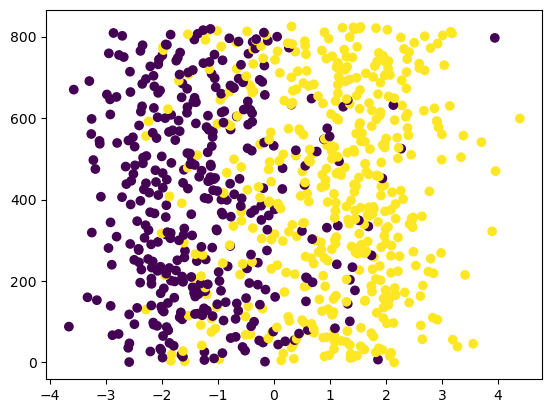

In [75]:
plt.scatter(pca_result[:, 0], range(0, len(pca_result)), c=y_train)

In [76]:
tsne = TSNE(n_components=2, perplexity=50 ,random_state=123)
tsne_result = tsne.fit_transform(X_train)

In [78]:
tsne_result

array([[ 13.168695  , -16.022005  ],
       [-22.564285  , -14.188851  ],
       [ -7.8955545 ,   0.24179956],
       ...,
       [ 10.764333  , -13.778343  ],
       [ 13.430008  ,   6.9961457 ],
       [ -2.2399395 ,  -2.5535855 ]], dtype=float32)

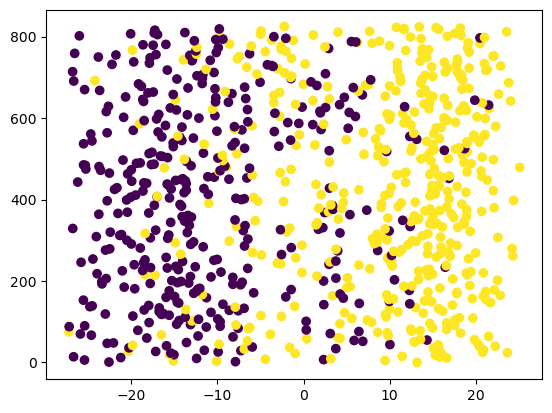

In [79]:
plt.scatter(tsne_result[:, 0], range(0, len(tsne_result)), c=y_train)